In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [15]:
def expc(x):
    return(cos(x) + sin(x)*1j)

In [16]:
#Définition des estimateurs

def blackman_estimator(x):
    N = len(x)
    estimator = []
    for k in range(-N+1,N):
        somme = 0
        for n in range(N - abs(k)):
            somme += x[n+abs(k)]*x[n]
        estimator.append(somme/(N-abs(k)))
    return(estimator)


def barlett_estimator(x):
    N = len(x)
    estimator = []
    for k in range(-N+1,N):
        somme = 0
        for n in range(N - abs(k)):
            somme += x[n+abs(k)]*x[n]
        estimator.append(somme/N)
    return(estimator)

def estimator(x,name):
    if name == "blackman":
        return(blackman_estimator(x))
    elif name == "barlett":
        return(barlett_estimator(x))

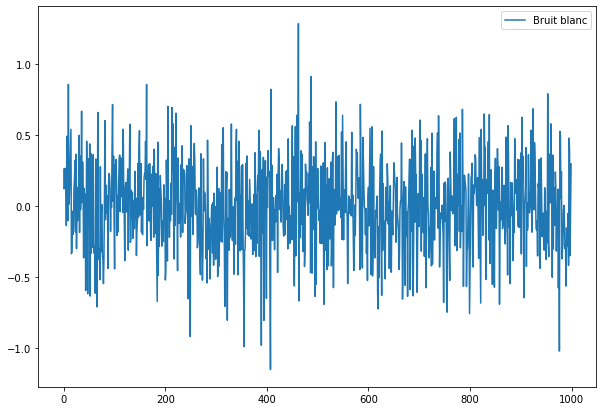

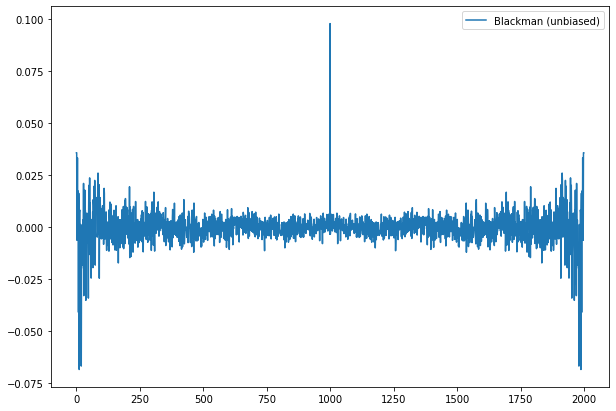

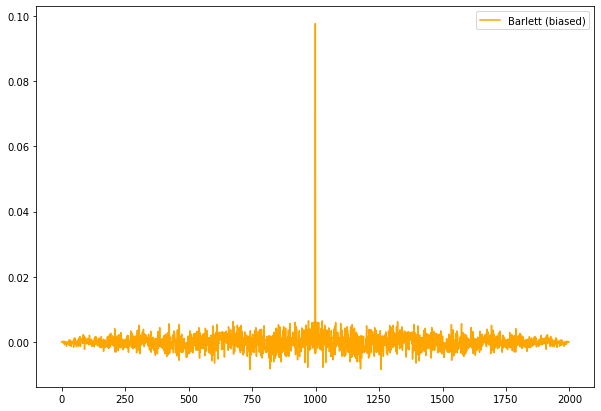

In [17]:
#Bruit blanc et estimateurs

mean = 0
variance = 0.1
N = 1000

std = variance**(1/2)
white_noise = np.random.normal(mean, std, size=N)
plt.figure(figsize=(10,7))
plt.plot(white_noise, label='Bruit blanc')
plt.legend()
plt.show()

blackman = estimator(white_noise, "blackman")
barlett = estimator(white_noise, "barlett") 
plt.figure(figsize=(10,7))
plt.plot()
plt.plot(blackman, label="Blackman (unbiased)")
plt.legend()
plt.figure(figsize=(10,7))
plt.plot()
plt.plot(barlett, color='orange', label="Barlett (biased)")
plt.legend()
plt.show()

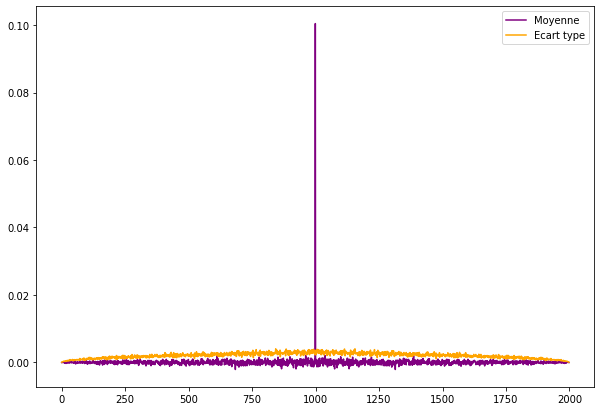

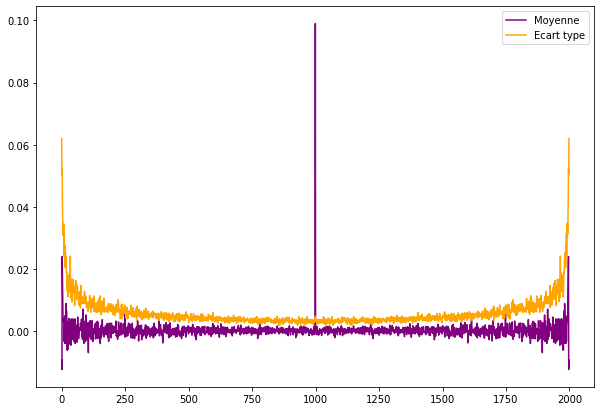

In [18]:
#Statistiques sur l'estimateur de la fonction d'autocorrélation

mean = 0
variance = 0.1
std = variance**(1/2)
N = 1000
M = N-1

#Calcul de K fonctions de corrélations sur K tranches disctinctes
samples = []
Kmax = 20
for K in range(Kmax):
    white_noise = np.random.normal(mean, std, size=N)
    sample = estimator(white_noise, "barlett")
    samples.append(sample)

#Réarrangement des valeurs pour faciliter les calculs de statistiques
A0 = []  
for k in range(2*M+1):
    A1 = []
    for K in range(Kmax):
        A1.append(samples[K][k])
    A0.append(A1)

#Calcul de la moyenne
mean_values = []
for k in range(len(A0)):
    mean = np.mean(A0[k])
    mean_values.append(mean)

#Calcul de la variance
var_values = []
for k in range(len(A0)):
    var = np.var(A0[k])
    var_values.append(var)

#Tracés
plt.figure(figsize=(10,7))
plt.plot(mean_values, color='purple', label='Moyenne')
plt.plot([value**(1/2) for value in var_values], color='orange', label="Ecart type")
plt.legend()
plt.show()

#Calcul de K fonctions de corrélations sur K tranches disctinctes
samples = []
Kmax = 20
for K in range(Kmax):
    white_noise = np.random.normal(mean, std, size=N)
    sample = estimator(white_noise, "blackman")
    samples.append(sample)

#Réarrangement des valeurs pour faciliter les calculs de statistiques
A0 = []  
for k in range(2*M+1):
    A1 = []
    for K in range(Kmax):
        A1.append(samples[K][k])
    A0.append(A1)

#Calcul de la moyenne
mean_values = []
for k in range(len(A0)):
    mean = np.mean(A0[k])
    mean_values.append(mean)

#Calcul de la variance
var_values = []
for k in range(len(A0)):
    var = np.var(A0[k])
    var_values.append(var)

#Tracés
plt.figure(figsize=(10,7))
plt.plot(mean_values, color='purple', label='Moyenne')
plt.plot([value**(1/2) for value in var_values], color='orange', label="Ecart type")
plt.legend()
plt.show()

In [19]:
#Définition de l'estimateur de DSP

def spectral_density_estimator(estimator,l):
    M = int((len(estimator)-1)/2)
    spectral_density = 0
    for k in range(-M,M+1):
        spectral_density += estimator[k+M]*expc(-2*pi*k*l/M)
    return(spectral_density)

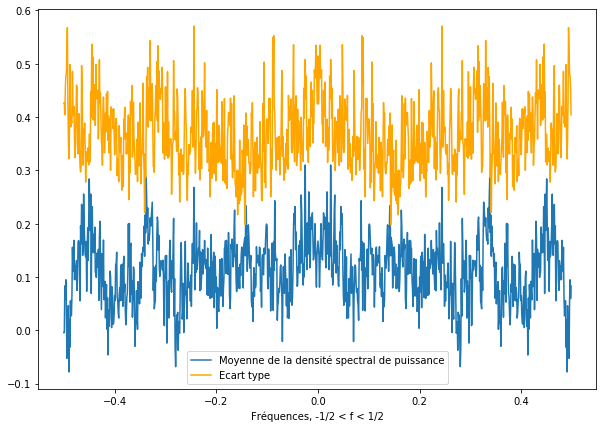

In [20]:
#Statistiques sur l'estimateur de DSP

mean = 0
variance = 0.1
std = variance**(1/2)
N = 1000
M = N-1

#Calcul de K densité spectrale sur K tranches disctinctes
samples = []
Kmax = 30
L = [l for l in range(-(M+1)//2,M//2)]
for K in range(Kmax):
    white_noise = np.random.normal(mean, std, size=N)
    xcorr = estimator(white_noise, "blackman")
    sample = [spectral_density_estimator(xcorr,l).real for l in L]
    samples.append(sample)

#Réarrangement des valeurs pour faciliter les calculs de statistiques
A0 = []  
for k in range(len(samples[0])):
    A1 = []
    for K in range(Kmax):
        A1.append(samples[K][k])
    A0.append(A1)
    
#Calcul de la moyenne
mean_values = []
for k in range(len(A0)):
    mean = np.mean(A0[k])
    mean_values.append(mean)

#Calcul de la variance
var_values = []
for k in range(len(A0)):
    var = np.var(A0[k])
    var_values.append(var)

F = [l/M for l in L]
plt.figure(figsize=(10,7))
plt.plot(F, mean_values, label='Moyenne de la densité spectral de puissance')
plt.plot(F, [value**(1/2) for value in var_values], color='orange', label="Ecart type")
plt.xlabel('Fréquences, -1/2 < f < 1/2')
plt.legend()
plt.show()

In [21]:
#Puissance du signal

integrale = 0
for y in mean_values:
    integrale += 1/M*y
print(integrale, np.mean(mean_values))

0.11253370396356349 0.1125337039635635


In [23]:
#Réponse impulsionnelle récursive

def h_rec(n):
    B = [0.0154, 0.0461, 0.0461, 0.0154]
    A = [1.9903, -1.5717, +0.458]
    if n<0:
        return(0)
    if 0 <= n < len(B):
        return(B[n] + sum(A[k-1]*h_rec(n-k) for k in range(1,len(A)+1)))
    elif n >= len(B):
        return(sum(A[k-1]*h_rec(n-k) for k in range(1,len(A)+1)))   

<StemContainer object of 3 artists>

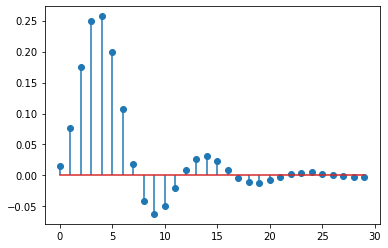

In [24]:
#Réponse impulsionnelle non récursive

def h(N):
    H = [h_rec(n) for n in range(0,10)]
    A = [1.9903, -1.5717, +0.458]
    for k in range(0,N-10):
        H.append(sum(A[k-1]*H[-k] for k in range(1,len(A)+1)))
    return(H)

plt.stem(h(30), use_line_collection = True)

In [25]:
#Définition de la TFD d'un signal discret

def FFD(sample, l):
    M = len(sample)
    spectral_density = 0
    for k in range(0,len(sample)):
        spectral_density += sample[k]*expc(-2*pi*k*l/len(sample))
    return(spectral_density)

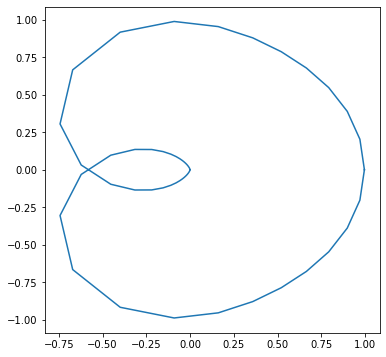

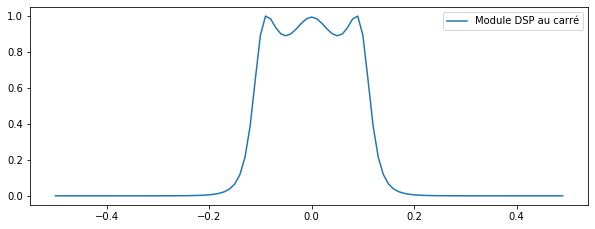

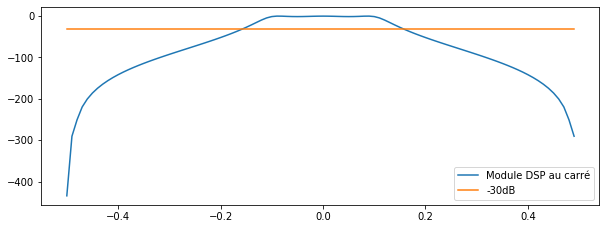

Première fréquence < 0 telle que le module de la DSP soit supérieure à -30dB : -0.15
Dernière fréquence > 0 telle que le module de la DSP soit supérieure à -30dB : 0.15


In [28]:
#Réponse impulsionnelle du filtre

H = h(100)
L = [l for l in range(-len(H)//2,len(H)//2)]
F = [l/len(H) for l in L]
Y = [abs(FFD(H,l))**2 for l in L]
Z = [10*log(abs(FFD(H,l))**2) for l in L]

#Tracé de la DSP dans le plan complexe
plt.figure(figsize=(6,6))
plt.plot([FFD(H,l).real for l in range(0,len(H)+1)],[FFD(H,l).imag for l in range(0,len(H)+1)])
plt.show()

#Tracé du module de la DSP
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(F,Y, label='Module DSP au carré')
plt.legend()
plt.show()

#Tracé echelle log
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
plt.plot(F,Z, label='Module DSP au carré')
plt.plot(F,[-30 for f in F], label='-30dB')
plt.legend()
plt.show()

#Première fréquence < 0 telle que le module de la DSP soit supérieure à -30dB
i = 0
while Z[i]<-30:
    i += 1
print("Première fréquence < 0 telle que le module de la DSP soit supérieure à -30dB :",F[i])
#Première fréquence > 0 telle que le module de la DSP soit inférieure à -30dB
i = len(H)//2
while Z[i]>-30:
    i += 1
print("Dernière fréquence > 0 telle que le module de la DSP soit supérieure à -30dB :", F[i-1])

test2


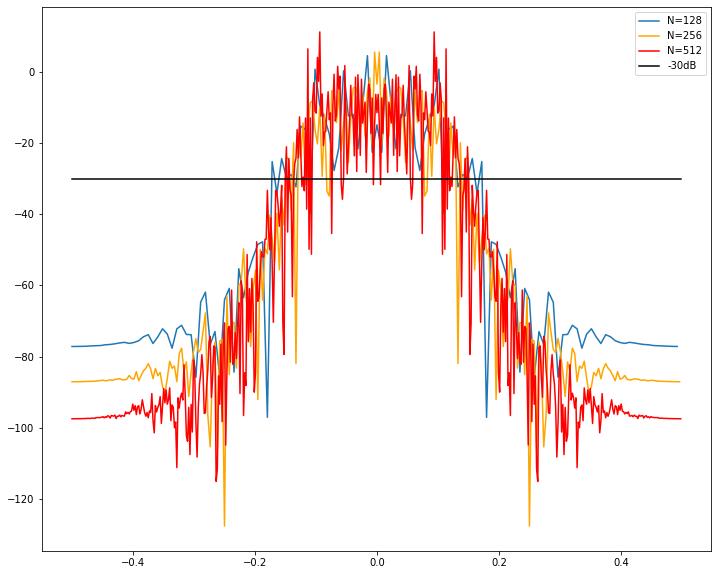

In [29]:
#Périodogramme du signal1

listN = [128, 256, 512]
mean = 0
variance = 0.5
std = variance**(1/2)
print('test2')

plt.figure(figsize=(12,10))
for N in listN:
    white_noise = np.random.normal(mean, std, size=N)
    H = h(N)
    #La sortie est le produit de convolution de l'entrée et de la réponse impulsionnelle
    Y = []
    for n in range(0,N):
        y = 0
        for k in range(0,n+1):
            y += white_noise[k]*H[n-k]
        Y.append(y)

    #Calcul de la transformée de Fourier de la sortie
    L = [l for l in range(-N//2,N//2)]
    F = [l/N for l in L]
    TFD = [1/N*abs(FFD(Y,l))**2 for l in L]
    logTFD = [10*log(1/N*abs(FFD(Y,l))**2) for l in L]
    if N == 128:
        plt.plot(F,logTFD, label='N=128')
    elif N == 256:
        plt.plot(F,logTFD, label='N=256', color='orange')
    elif N == 512:
        plt.plot(F,logTFD, label='N=512', color='red')
plt.plot(F, [-30 for f in F], label='-30dB', color='black')
plt.legend()
plt.show()

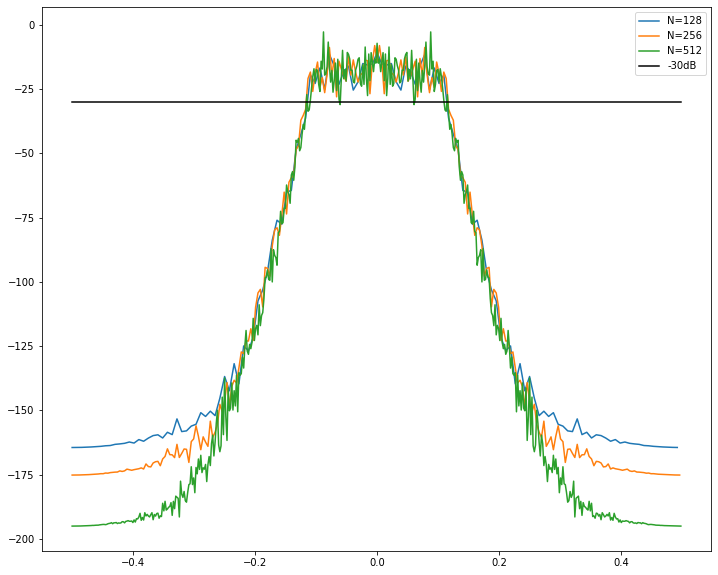

In [30]:
#Statistiques du périodogramme du signal1

listN = [128, 256, 512]
mean = 0
variance = 0.5
std = variance**(1/2)

plt.figure(figsize=(12,10))
for N in listN:
    Kmax = 30
    samples = []
    for K in range(0,Kmax):
        white_noise = np.random.normal(mean, std, size=N)
        H = h(N)
        #La sortie est le produit de convolution de l'entrée et de la réponse impulsionnelle
        Y = []
        for n in range(0,N):
            y = 0
            for k in range(0,n+1):
                y += white_noise[k]*H[n-k]
            Y.append(y)

        #Calcul de la transformée de Fourier de la sortie
        L = [l for l in range(-N//2,N//2)]
        F = [l/N for l in L]
        TFD = [1/N*abs(FFD(Y,l))**2 for l in L]
        samples.append(TFD)

    #Réarrangement des valeurs pour faciliter les calculs de statistiques
    A0 = []  
    for k in range(len(samples[0])):
        A1 = []
        for K in range(Kmax):
            A1.append(samples[K][k])
        A0.append(A1)

    #Calcul de la moyenne
    mean_values = []
    for k in range(len(A0)):
        mean = np.mean(A0[k])
        mean_values.append(mean)

    #Calcul de la variance
    var_values = []
    for k in range(len(A0)):
        var = np.var(A0[k])
        var_values.append(var)
    
    if N == 128:
        plt.plot(F, [10*log(value) for value in var_values], label='N=128')
    elif N == 256:
        plt.plot(F, [10*log(value) for value in var_values], label='N=256')
    elif N == 512:
        plt.plot(F, [10*log(value) for value in var_values], label='N=512')
plt.plot(F, [-30 for f in F], label='-30dB', color='black')
plt.legend()
plt.show()

Valeur moyenne pour N = 128  : 0.5242429917159411
Valeur moyenne pour N = 256  : 0.41027641452830776
Valeur moyenne pour N = 512  : 0.5042205545747819


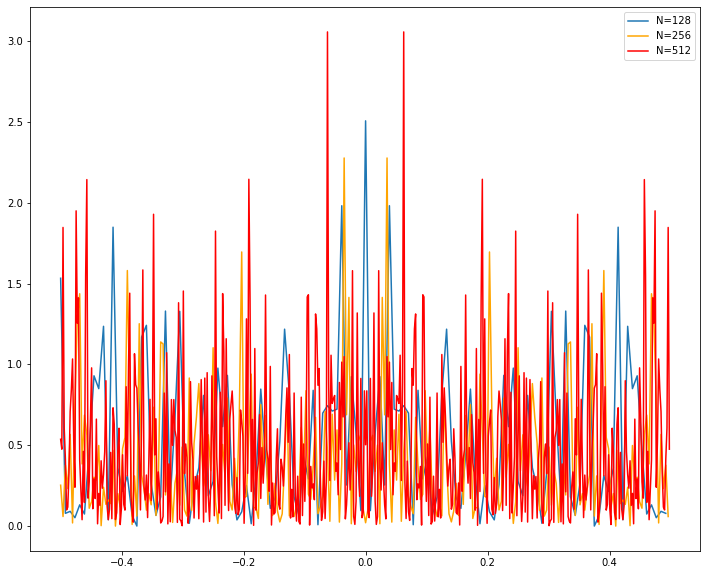

In [31]:
#Périodogramme d'un bruit blanc gaussien

listN = [128, 256, 512]
mean = 0
variance = 0.5
std = variance**(1/2)

plt.figure(figsize=(12,10))
for N in listN:
    white_noise = np.random.normal(mean, std, size=N)
    #Calcul de la transformée de Fourier
    L = [l for l in range(-N//2,N//2)]
    F = [l/N for l in L]
    TFD = [1/N*abs(FFD(white_noise,l))**2 for l in L]
    logTFD = [10*log(1/N*abs(FFD(white_noise,l))**2) for l in L]
    if N == 128:
        plt.plot(F,TFD, label='N=128')
    elif N == 256:
        plt.plot(F,TFD, label='N=256', color='orange')
    elif N == 512:
        plt.plot(F,TFD, label='N=512', color='red')
    print("Valeur moyenne pour N =", N," :", np.mean(TFD))
plt.legend()
plt.show()

Valeur moyenne (sur les fréquences) de la DSP : 0.5045835161545762


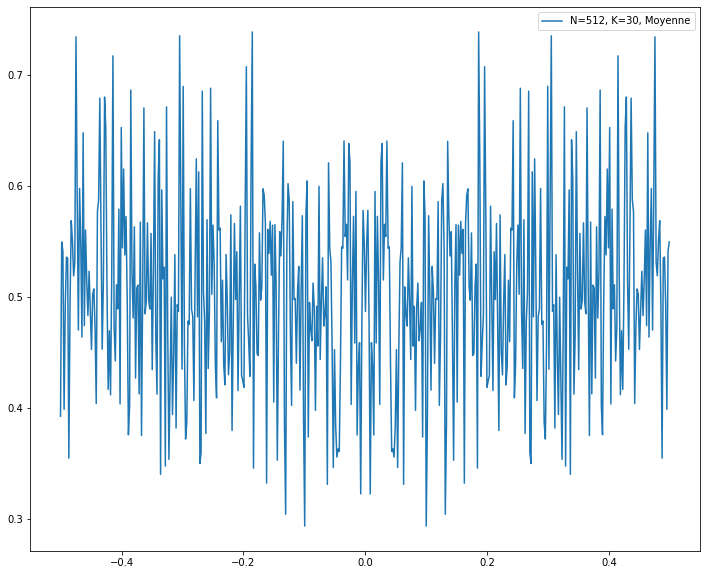

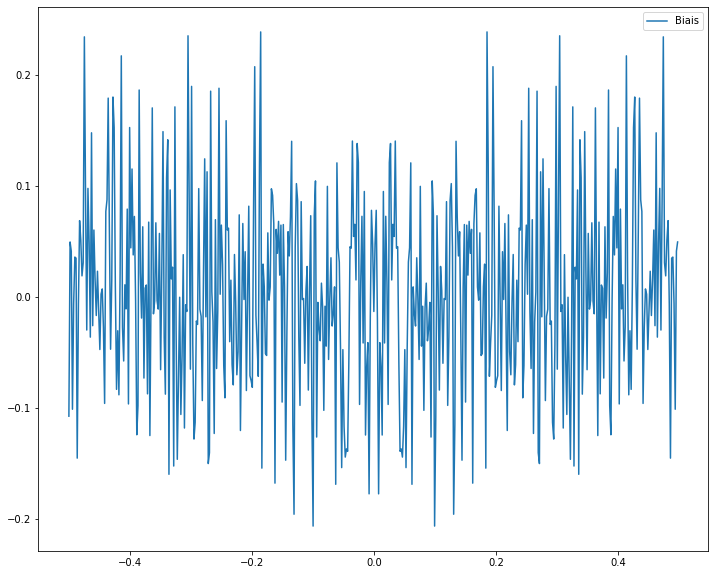

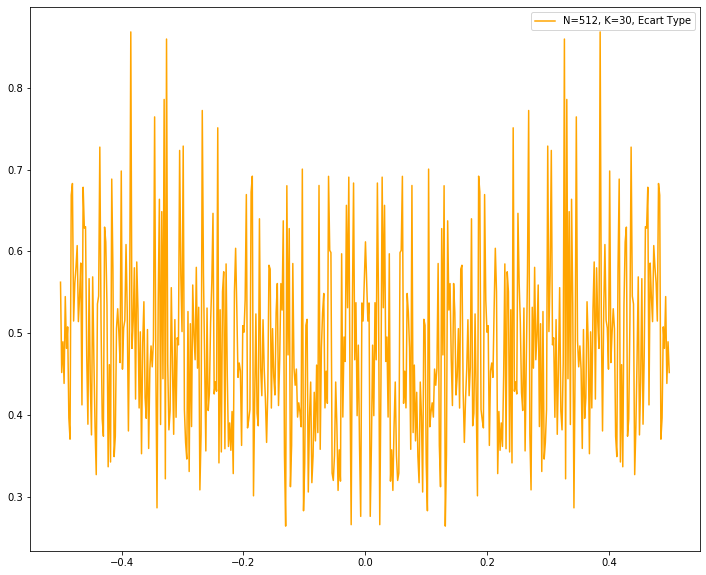

In [32]:
#Statistiques sur le périodogramme du bruit blanc gaussien

listN = [512]
mean = 0
variance = 0.5
std = variance**(1/2)

#plt.figure(figsize=(12,10))
for N in listN:
    Kmax = 30
    samples = []
    for K in range(0,Kmax):
        L = [l for l in range(-N//2,N//2)]
        F = [l/N for l in L]
        white_noise = np.random.normal(mean, std, size=N)
        #Calcul de la transformée de Fourier
        TFD = [1/N*abs(FFD(white_noise,l))**2 for l in L]
        samples.append(TFD)
        
    #Réarrangement des valeurs pour faciliter les calculs de statistiques
    A0 = []  
    for k in range(len(samples[0])):
        A1 = []
        for K in range(Kmax):
            A1.append(samples[K][k])
        A0.append(A1)

    #Calcul de la moyenne
    mean_values = []
    for k in range(len(A0)):
        mean = np.mean(A0[k])
        mean_values.append(mean)

    #Calcul de la variance
    var_values = []
    for k in range(len(A0)):
        var = np.var(A0[k])
        var_values.append(var)
    
    '''if N == 128:
        plt.plot(F, [value for value in mean_values], label='N=128')
    elif N == 256:
        plt.plot(F, [value for value in mean_values], label='N=256')
    elif N == 512:
        plt.plot(F, [value for value in mean_values], label='N=512')'''

print("Valeur moyenne (sur les fréquences) de la DSP :", np.mean(mean_values))
plt.figure(figsize=(12,10))
plt.plot(F, mean_values, label='N=512, K=30, Moyenne')
plt.legend()
plt.show()

plt.figure(figsize=(12,10))
plt.plot(F, [value - 0.5 for value in mean_values], label='Biais')
plt.legend()
plt.show()

plt.figure(figsize=(12,10))
plt.plot(F, [value**(1/2) for value in var_values], label='N=512, K=30, Ecart Type', color='orange')
plt.legend()
plt.show()